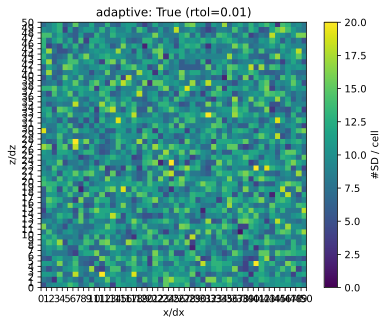

HTML(value="<a href='./fig_displacement_rtol=0.01_step=0.pdf' target='_blank'>./fig_displacement_rtol=0.01_ste…

0.0% (times since last print: cpu=7.1s wall=221.6s)


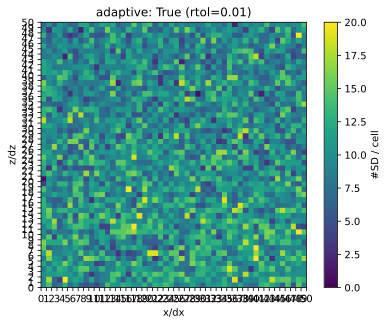

HTML(value="<a href='./fig_displacement_rtol=0.01_step=125.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

12.5% (times since last print: cpu=6.6s wall=2.3s)


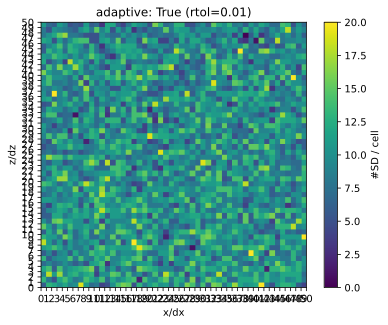

HTML(value="<a href='./fig_displacement_rtol=0.01_step=250.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

25.0% (times since last print: cpu=7.7s wall=2.8s)


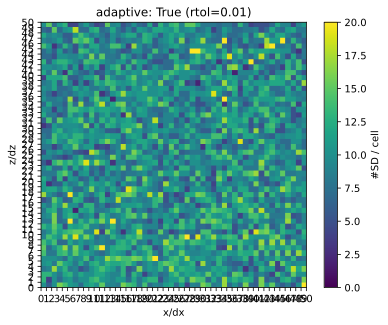

HTML(value="<a href='./fig_displacement_rtol=0.01_step=375.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

37.5% (times since last print: cpu=8.3s wall=2.9s)


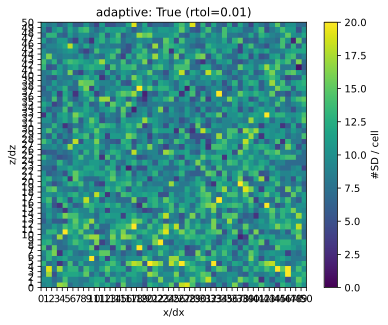

HTML(value="<a href='./fig_displacement_rtol=0.01_step=500.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

50.0% (times since last print: cpu=7.2s wall=2.4s)


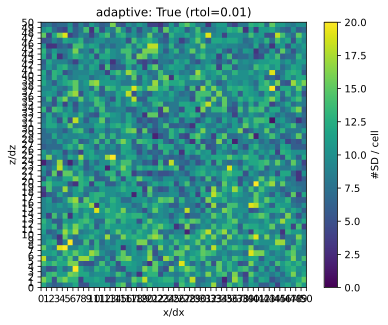

HTML(value="<a href='./fig_displacement_rtol=0.01_step=625.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

62.5% (times since last print: cpu=6.2s wall=2.1s)


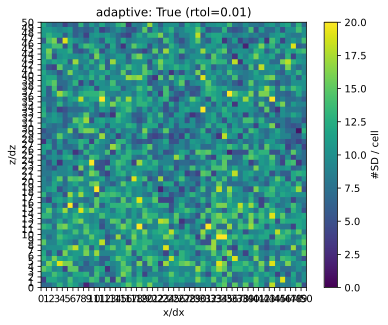

HTML(value="<a href='./fig_displacement_rtol=0.01_step=750.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

75.0% (times since last print: cpu=6.2s wall=2.0s)


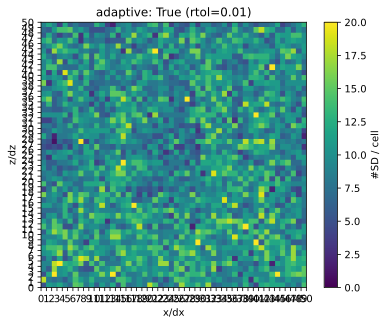

HTML(value="<a href='./fig_displacement_rtol=0.01_step=875.pdf' target='_blank'>./fig_displacement_rtol=0.01_s…

87.5% (times since last print: cpu=6.3s wall=2.1s)


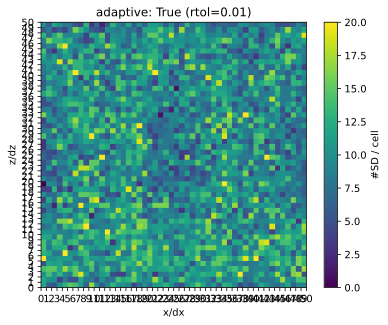

HTML(value="<a href='./fig_displacement_rtol=0.01_step=1000.pdf' target='_blank'>./fig_displacement_rtol=0.01_…

100.0% (times since last print: cpu=6.2s wall=2.0s)


In [10]:
import numpy as np
from matplotlib import pyplot
from PySDM_examples.Arabas_et_al_2015 import Settings, SpinUp
from PySDM_examples.Szumowski_et_al_1998 import Simulation

from PySDM import Formulae
from PySDM.backends import CPU
from PySDM.physics import si
from PySDM.products import SuperDropletCountPerGridbox

from atmos_cloud_sim_uj_utils import show_plot

rtol = 0.01

class DummyStorage:
    def __init__(self):
        self.profiles = []

    def init(*_):  # pylint: disable=no-method-argument,no-self-argument
        pass

    def save(
        self, data: np.ndarray, step: int, name: str
    ):  # pylint: disable=unused-argument
        pyplot.imshow(
            data.T, origin="lower", extent=(0, settings.grid[0], 0, settings.grid[1])
        )
        cbar = pyplot.colorbar()
        cbar.set_label("#SD / cell")

        pyplot.clim(0, 2 * settings.n_sd_per_gridbox)
        pyplot.title(
            f"adaptive: {settings.displacement_adaptive} {f'(rtol={rtol})' if rtol else ''}"
        )
        pyplot.xlabel("x/dx")
        pyplot.ylabel("z/dz")
        pyplot.xticks(np.arange(settings.grid[0] + 1))
        pyplot.yticks(np.arange(settings.grid[1] + 1))
        show_plot(f"fig_displacement_rtol={rtol}_step={step}.pdf")

# Arrange
settings = Settings(formulae=Formulae(seed=666))
settings.dt = 1 * si.s
settings.grid = (50, 50)
settings.n_sd_per_gridbox = 10
settings.rhod_w_max = 10 * si.m / si.s * si.kg / si.m**3

settings.simulation_time = 1000 * si.s
settings.spin_up_time = settings.simulation_time
settings.output_interval = settings.simulation_time / 8
if rtol is not None:
    settings.displacement_adaptive = True
    settings.displacement_rtol = rtol
else:
    settings.displacement_adaptive = False
settings.processes["condensation"] = False

storage = DummyStorage()
simulation = Simulation(settings, storage, SpinUp=SpinUp, backend_class=CPU)
simulation.reinit(products=[SuperDropletCountPerGridbox()])

# Act
simulation.run()